# [Part1] 서술형 문제

## 1. 모델의 과대적합, 과소적합, 일반화의 정의를 서술하고 수학적 예제를 들어 설명하시오.


### 과대적합
* 가진 정보를 모두 사용하여 너무 복잡한 모델을 만드는 것
* 과대적합 모델은 훈련 데이터셋에 잘 맞춰져 새로운 데이터를 잘 평가하지 못함
* 예를들어 회귀 문제에서 데이터 포인트가 10개가 주어졌다면, 과대적합은 10개중 과하게 다수의 데이터 포인트에 맞춰서 모델을 만드는 것이다. 10개중 7개의 데이터 포인트에 맞춘다면 7차 다항식 모델이 만들어진다 . 그렇게되면 모델의 복잡도가 증가하고 데이터포인트 사이사이의 모델값의 분산이 커지게되어 새로운 데이터 포인트에대한 예측오차가 커지게된다.
### 과소적합
* 모델의 복잡도가 너무 낮아, 데이터의 특성이 모델에 잘 반영되지 않음
* 훈련세트에도 낮은 정확도가 나올 확률이 높다.
* 특성 수와 데이터 샘플 갯수를 늘려야 한다.
* 파라미터 업데이트시 제약을 줄인다
* 특성수를 늘리는 방법은 기존의 특성들을 조합하여 새로운 특성들을 만드는 방법이있다. 그중 하나로 polynomial 방법은 m개의 특성(x_1, x_2, ..., x_n)을 2차형식으로 조합해 기존 특성뒤에 x_1^2, x_1x_2, x_1x_3, ..., x_n^2으로 총 n^n 개의 특성을 늘린뒤, PCA기법으로 특성수를 추출해 학습 시킬 수 있다.
* 샘플수를 늘리는 방법은 scikitlearn 라이브러리 안의 oversampling의 여러기법중 적절한 것을 선택해 샘플의 갯수를 늘릴 수 있다.
### 일반화
* 과대적합과 과소적합의 절충안으로서 training data와 test data의 성능 최적점을 찾는 것이 일반화다. 어느 한쪽으로 치우쳐지지 않게끔 적절한 선에서 훈련을 중단하거나, 정규화를 해주어 파라미터값을 규제하는 방법이 있다.
* 정규화는 파라미터값에 규제를 가하는 것인데 특정 feature가 다른 feature들을 지배하는 것을 막는 기법으로, 매 훈련마다 파라미터 업데이트시 전체 파라미터에 각 파라미터값의 나누기값을 계속해서 -를 해주어 영향이 큰 파라미터값을 작게하는 것이다. l1 정규화는 alpha값을 크게하면 아예 그 특성을 배재해버린다.

## 2. 훈련 세트에 있는 특성들이 아주 다른 스케일을 가지고 있다고 하자. 이런 데이터에 잘 작동하지 않는 회기 알고리즘은 무엇인가? 그 이유를 설명하고 이 문제를 해결할 방법을 제시하시오.
KNeighborsRegressor
K-NN 기법은 각 샘플(data point)간의 거리를 측정해 모델을 만든다.  
따라서 특성의 단위값에 영향을 많이 받는다. 예를들어 1km = 1000m = 100000cm 로 모두 같은 값을 뜻하지만 계산에 있어 [2,3] 과 [3, 4]의 차이와 [2000, 3000], [3000, 4000] 의 거리차이는 매우 크다. 게다가 숫자자체가 워낙 차이가 많이나서 큰값을 가지는 특성이 다른 특성을 무시해버릴 정도로 영향력이 막강해서 과소적합이 일어날 수 있다. 따라서 전처리 과정에서 모든 데이터들을 표준화(최대 최소값이 일정한 범위안에 들어오도록 feature들을 조정하는것) 해줘야한다.  
대표적인 표준화로는 standard_scaler, minmax_scaler이 있다.


## 3. 다음과 같이 사용해야 하는 이유를 설명하시오.
### 1)규제가 없는 선형 모델 대신 릿지 회귀
규제가 없는 선형 모델은 훈련 epoch를 많이 하거나 데이터셋의 크기에 따라 과대적합이 일어날 수 있다.
실제로 lecture10 강의노트 10쪽을 보면 l2규제를한 Ridge 회귀에비해 LinearRegression의 test성능이 현저하게 떨어지는 것을 볼 수 있다. 과대적합을 방지하기 위해선 Ridge규제를 해야한다.

### 2)릿지 회귀 대신 라쏘 회귀
릿지회귀와 라쏘 회귀는 파라미터 크기를 줄여 규제한다는 공통점이 있지만 라쏘 회귀는 규제계수(alpha)값이 크면 모델에 영향을 많이주는 특성값을 0으로 만든다(라쏘는 0은 아니지만 매우 작게만듬). alpha값이 너무 커지면 전체 특성중 일부분 밖에 사용하지 않아 과소적합이 일어난다. 그러므로 사전에 데이터셋 분석을통해 별로 중요하지 않은 특성에대한 정보를 파악 했다면 라쏘회귀를 쓰는것이 릿지 회귀보다 효율적이지만 그렇지 않은 경우엔 릿지 회귀를 쓰는것이 좋다.
### 3)라쏘 회귀 대신 엘라스틱넷
엘라스틱넷은 라쏘 회귀와 릿지회귀의 convex combination이다. 라쏘와 릿지에비해 좋은 성능을 내지만 convex conbination 조합을 잘 정해야한다.
특성 수가 훈련샘플 수보다 많거나 특성 몇개가 강하게 연관되어 있을 땐 엘라스틱넷이 더 좋다.

## 4.사진을 낮과 밤, 실내와 실외로 분류하려 한다. 다음 중 어떤 분류기를 사용해야 하는 지 선택하고 그 이유를 설명하시오.
* 1)두 개의 로지스틱 회귀 분류기
* 2)소프트맥스 회귀 분류기

여러개(3개이상)의 클래스 중 하나를 구별하고 싶을 땐 소프트맥스 회귀 분류기를 사용하는 것이 좋고 이진 분류에선 로지스틱 회귀 분류기를 사용하는 것이 좋다.  
**(사실 문제가 이해되지않아 2가지 경우를 써보겠습니다. (낮/밤/실내/실외)를 구별하는 건지, (낮인 실내/낮인 실외/밤인 실내/밤인 실회)를 구별하는 것인지 이해가 안되었습니다.)**
### 1) 낮/밤/실내/실외 구별
총 4개의 클래스중 한 클래스를 구별하는 문제에선 다중분류(softmax) 가 더 좋습니다. 다중 분류기는 각클래스별 score를 내서 가장 높은 score를 받은 클래스를 output으로 냅니다. 따라서 샘플사진을 각 클래스별 점수를내 가장 높은 점수를 얻은 클래스를 예측값으로 쓰는 softmax를 쓰는것이 좋습니다.
### 2) 낮인 실내/낮인 실외/밤인 실내/밤인 실외
이경우 클래스가 4개인것 같지만, 따지고보면 낮/밤과 실내/실외는 독립입니다. 따라서 낮/밤 구별따로 실내/실외 구별을 따로한 결과를 내는 문제입니다. 이진분류를 2번 쓰는것입니다. 따라서 이 경우엔 2개의 로지스틱분류기(하나는 낮/밤, 하나는 실내/실외)를 이용하는 것이 좋습니다. 

# [Part2] 프로그램 문제 (파이썬 프로그램을 이용하여 다음 문제를 해결하시오.)

## 1. mglearn의 wave 데이터셋을 사용하여 다음 각각의 회귀 모델을 최대의 성능으로 학습시켜 모델의 성능을 비교하시오.
* 1)선형 회귀 모델
* 2)결정 트리 회귀 모델
* 3)릿지 회귀 모델
* 4)라쏘 회귀 모델

wave 데이터셋은 다음과 같이 생성하시오.
* wave 데이터셋의 샘플수는 200개로 하시오.
* Y 훈련세트와 테스트세트는 'random_state =43'를 적용하여 분리하시오.
결정트리 모델 ‘DecisionTreeRegressor’에서 옵션‘min_samples_split=3’를
적용하시오.
릿지와 라쏘 회귀 모델에서 alpha 의 변화에 따른 성능을 비교하시오. 
wave 데이터셋으로 모델을 만들고 numpy의 ‘linspace’로 1,000개의 x축 포인트를 담은 NumPy 배열 line을 만들어 모델의 예측값을 시각화하시오.

In [1]:
#wave_set의 산점도
def show_plot(X, y, title) :
    plt.plot(X, y,
             linestyle='none', 
             marker='o', 
             markersize=10,
             color='blue', 
             alpha=0.5)

    plt.title(title, fontsize=20)
    plt.xlabel('X', fontsize=14)
    plt.ylabel('y', fontsize=14)
    plt.show()

/home/hms/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/home/hms/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


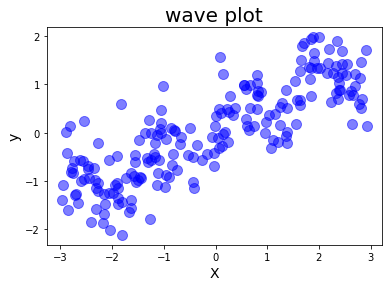

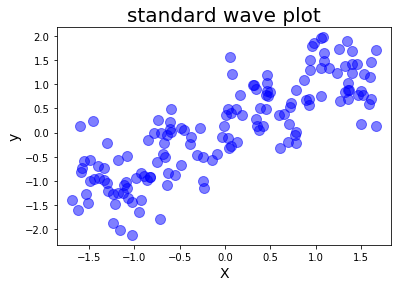

In [2]:
#Data prepare set
import mglearn.datasets
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler

X, y = mglearn.datasets.make_wave(n_samples=200) #각 200개씩 데이터 샘플 make

show_plot(X, y, 'wave plot')


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=43)

#X_train, X_test표준화
scaler = StandardScaler()
scaler.fit(X_train) #일반화를 위해 train데이터 standard 객체를 test객체에 적용
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)
X_sc = scaler.transform(X)

show_plot(X_train_sc, y_train, 'standard wave plot')

#-1<=X_samples<=1사이 1000개의 point들
X_samples = np.linspace(-1,1,1000) # shape = (1000,)
X_samples = np.reshape(X_samples, (1000, 1)) # shape = (1000, 1)

## 선형 회귀모델

coef : [0.8043042] intercept : 0.06872959534519019


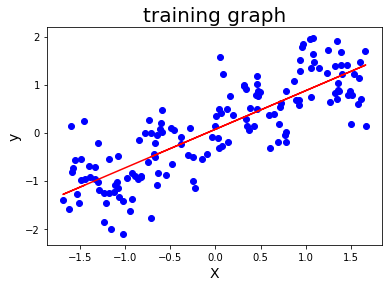

Training set score: 0.68
Test set score: 0.64


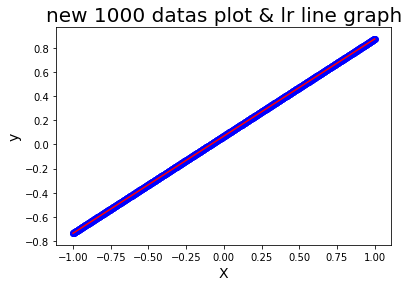

In [3]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

#경사하강 sgd
lr = LinearRegression()

lr.fit(X_train_sc, y_train)
print('coef :',lr.coef_, 'intercept :',lr.intercept_)

def lin_regplot(X, y, model, title):
    plt.scatter(X, y, c='blue')
    plt.plot(X, model.predict(X), color='red')  
    plt.title(title, fontsize=20)
    plt.xlabel('X', fontsize=14)
    plt.ylabel('y', fontsize=14)
    return

lin_regplot(X_train_sc, y_train, lr, 'training graph')
plt.show()

y_pred = lr.predict(X_samples)

print("Training set score: {:.2f}".format(lr.score(X_train_sc, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test_sc, y_test)))

lin_regplot(X_samples, y_pred, lr, 'new 1000 datas plot & lr line graph')

## 결정 트리 회귀 모델

maxdepth에 따른 결정트리 그래프를 보려했지만
산점도 그래프라 시각적인 정보는 얻지 못하였다.

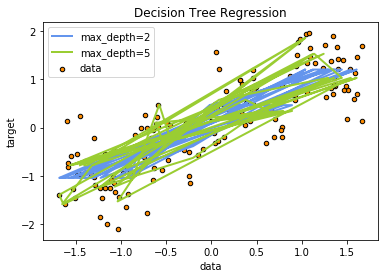

In [4]:
from sklearn.tree import DecisionTreeRegressor


regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X_train_sc, y_train)
regr_2.fit(X_train_sc, y_train)

#predict
y_1 = regr_1.predict(X_test_sc)
y_2 = regr_2.predict(X_test_sc)


# Plot the results
plt.figure()
plt.scatter(X_train_sc, y_train, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_test_sc, y_1, color="cornflowerblue",
         label="max_depth=2", linewidth=2)
plt.plot(X_test_sc, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

DecisionTree는 파라미터가 워낙 많기 때문에 튜닝을 각 파라미터마다 하나씩 하여 가장 점수가 높았던 파라미터를 이용하였다.

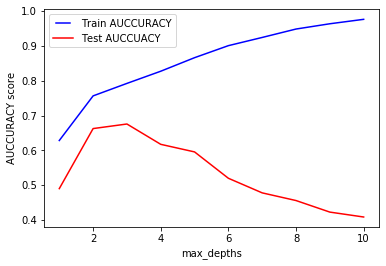

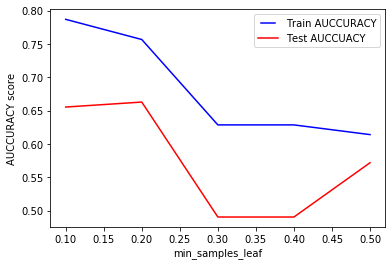

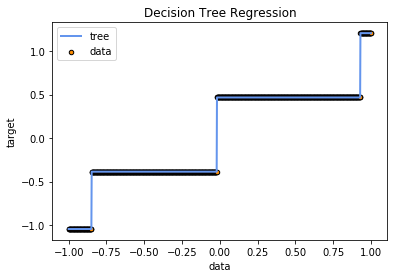

In [5]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score

#===============depth tunning====================
'''
depth범위를 1~10까지 training과 test 정확도를 비교
'''
max_depths = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
train_results = []
test_results = []

for max_depth in max_depths:
    dtr = DecisionTreeRegressor(min_samples_split = 3,
                                max_depth = max_depth)
    dtr.fit(X_train_sc, y_train)
    aucc = dtr.score(X_train_sc, y_train)
    train_results.append(aucc) #training accuracy list
    
    aucc = dtr.score(X_test_sc, y_test)
    test_results.append(aucc)#test accuracy list
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label="Train AUCCURACY")
line2, = plt.plot(max_depths, test_results, 'r', label="Test AUCCUACY")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUCCURACY score')
plt.xlabel('max_depths')
plt.show()
#best is 3



#============min_samples_leaf tunning===================
'''
min_samples_leaf범위를 0.1, 0.2, ~ 0.5까지 training과 test 정확도를 비교
'''
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
    dtr = DecisionTreeRegressor(max_depth = 3,
                                min_samples_split = 3,
                                min_samples_leaf=min_samples_leaf
                               )
    dtr.fit(X_train_sc, y_train)
    aucc = dtr.score(X_train_sc, y_train)
    train_results.append(aucc)
    
    aucc = dtr.score(X_test_sc, y_test)
    test_results.append(aucc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_leafs, train_results, 'b', label="Train AUCCURACY")
line2, = plt.plot(min_samples_leafs, test_results, 'r', label="Test AUCCUACY")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUCCURACY score')
plt.xlabel('min_samples_leaf')
plt.show()
#0.2 is best, test score = 0.66



#-1 to 1 1000개의 data 샘플들에대한 그래프
dtr = DecisionTreeRegressor(max_depth = 3,
                                min_samples_split = 3,
                                min_samples_leaf=0.2
                               )

dtr.fit(X_train_sc, y_train)
y_pred = dtr.predict(X_samples)

plt.figure()
plt.scatter(X_samples, y_pred, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_samples, y_pred, color="cornflowerblue",
         label="tree", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

## 릿지 회귀 모델

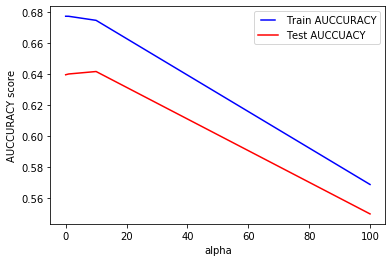

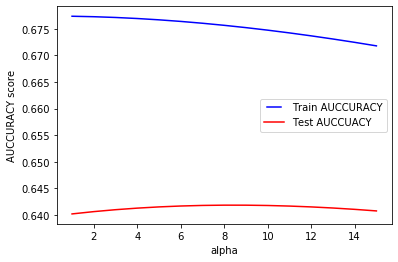

max test alpha :  8
max score :  0.6418551098829608


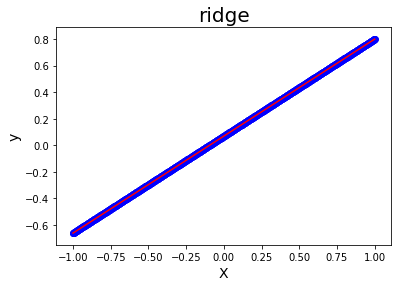

In [123]:
from sklearn.linear_model import Ridge

alphas = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
train_results = []
test_results = []
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train_sc, y_train)
    aucc = ridge.score(X_train_sc, y_train)
    train_results.append(aucc)
    
    aucc = ridge.score(X_test_sc, y_test)
    test_results.append(aucc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(alphas, train_results, 'b', label="Train AUCCURACY")
line2, = plt.plot(alphas, test_results, 'r', label="Test AUCCUACY")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUCCURACY score')
plt.xlabel('alpha')
plt.show()

#alpha가 10 언저리에서 test score가 제일 높으므로 범위를 다시 좁혀 튜닝한다.

alphas = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
train_results = []
test_results = []
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train_sc, y_train)
    aucc = ridge.score(X_train_sc, y_train)
    train_results.append(aucc)
    
    aucc = ridge.score(X_test_sc, y_test)
    test_results.append(aucc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(alphas, train_results, 'b', label="Train AUCCURACY")
line2, = plt.plot(alphas, test_results, 'r', label="Test AUCCUACY")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUCCURACY score')
plt.xlabel('alpha')
plt.show()
print('max test alpha : ', alphas[test_results.index(max(test_results))])
print('max score : ', max(test_results))

y_pred = ridge.predict(X_samples)
lin_regplot(X_samples, y_pred, ridge, 'ridge')

#alpha가 8일 때

## 라쏘 회귀모델

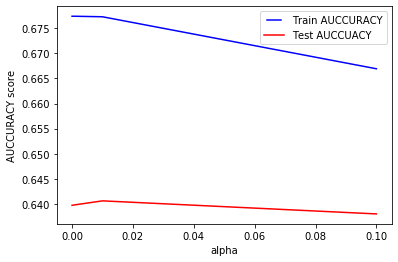

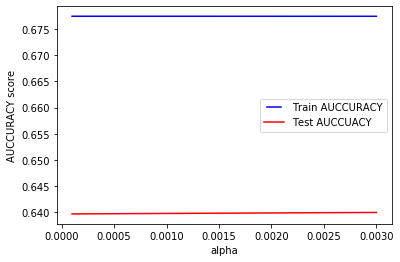

max test alpha :  0.003
max score :  0.6399971633804393


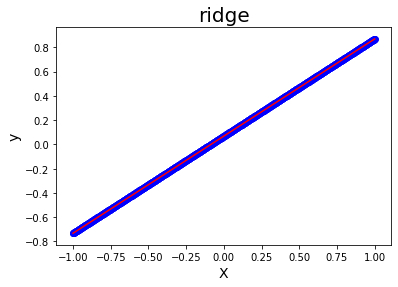

In [6]:
from sklearn.linear_model import Lasso

alphas = [0.00001, 0.0001, 0.001, 0.01, 0.1]
train_results = []
test_results = []
for alpha in alphas:
    rasso = Lasso(alpha=alpha)
    rasso.fit(X_train_sc, y_train)
    aucc = rasso.score(X_train_sc, y_train)
    train_results.append(aucc)
    
    aucc = rasso.score(X_test_sc, y_test)
    test_results.append(aucc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(alphas, train_results, 'b', label="Train AUCCURACY")
line2, = plt.plot(alphas, test_results, 'r', label="Test AUCCUACY")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUCCURACY score')
plt.xlabel('alpha')
plt.show()

#alpha가 0.02 이하에서 test score가 제일 높으므로 범위를 다시 좁혀 튜닝한다.

alphas = [0.0001, 0.0005, 0.001, 0.0015, 0.002, 0.0025, 0.003]
train_results = []
test_results = []
for alpha in alphas:
    rasso = Lasso(alpha=alpha)
    rasso.fit(X_train_sc, y_train)
    aucc = rasso.score(X_train_sc, y_train)
    train_results.append(aucc)
    
    aucc = rasso.score(X_test_sc, y_test)
    test_results.append(aucc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(alphas, train_results, 'b', label="Train AUCCURACY")
line2, = plt.plot(alphas, test_results, 'r', label="Test AUCCUACY")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUCCURACY score')
plt.xlabel('alpha')
plt.show()
print('max test alpha : ', alphas[test_results.index(max(test_results))])
print('max score : ', max(test_results))

y_pred = rasso.predict(X_samples)
lin_regplot(X_samples, y_pred, rasso, 'ridge')

#alpha가 0.003일 때

## 2. scikit-learn의 two_moon 데이터셋을 사용하여 RBF 커널 SVM 분류 모델를 학습시켜 훈련세트와 테스트세트의 성능을 비교하시오. 
two_moon데이터셋은 다음과 같이 샘플수 200개로 생성하시오.
* 데이터셋은 다음과 같이 샘플수 200개로 생성하시오.'X, y = make_moons(n_smaples=200, noise=0.1, random_state=0'
* 훈련세트와 테스트세트는 ‘random_state =43’를 적용하여 분리하시오
* RBF 커널 SVM의 매개변수 C와 gamma 설정에 따른 결정 경계를 그래프로 시각화하시오.

In [7]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from mglearn.plot_2d_separator import plot_2d_separator
from mglearn.tools import make_handcrafted_dataset
from mglearn.plot_helpers import discrete_scatter
from sklearn.datasets import make_moons
import mglearn

def plot_svm(log_C, log_gamma, ax=None):
    X, y = make_moons(n_samples=200, noise = 0.1, random_state=0)
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=43)

    #X_train, X_test표준화
    scaler = StandardScaler()
    scaler.fit(X_train) #일반화를 위해 train데이터 standard 객체를 test객체에 적용
    X_train_sc = scaler.transform(X_train)
    X_test_sc = scaler.transform(X_test)

    C = 10. ** log_C
    gamma = 10. ** log_gamma
    svm = SVC(kernel='rbf', C=C, gamma=gamma).fit(X_train_sc, y_train)
    if ax is None:
        ax = plt.gca()
    plot_2d_separator(svm, X_train_sc, ax=ax, eps=.5)
    # plot data
    discrete_scatter(X_train_sc[:, 0], X_train_sc[:, 1], y_train, ax=ax)
    # plot support vectors
    sv = svm.support_vectors_
    # class labels of support vectors are given by the sign of the dual coefficients
    sv_labels = svm.dual_coef_.ravel() > 0
    discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3, ax=ax)
    ax.set_title("C = %.4f gamma = %.4f" % (C, gamma))


def plot_svm_interactive():
    from IPython.html.widgets import interactive, FloatSlider
    C_slider = FloatSlider(min=-3, max=3, step=.1, value=0, readout=False)
    gamma_slider = FloatSlider(min=-2, max=2, step=.1, value=0, readout=False)
    return interactive(plot_svm, log_C=C_slider, log_gamma=gamma_slider)


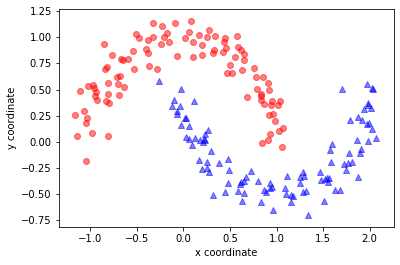

In [8]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=200, noise = 0.1, random_state=0)

plt.scatter(X[y==0, 0], X[y==0, 1], 
            color='red', marker='o', alpha=0.5)
plt.scatter(X[y==1, 0], X[y==1, 1], 
            color='blue', marker='^', alpha=0.5)
plt.ylabel('y coordinate')
plt.xlabel('x coordinate')

plt.show()

C : 0.1, 1, 1000  
gamma : 0.1, 1, 10  
범위에서의 커널 SVM 그래프
(mglearn 코드 수정하여 만들었습니다.)

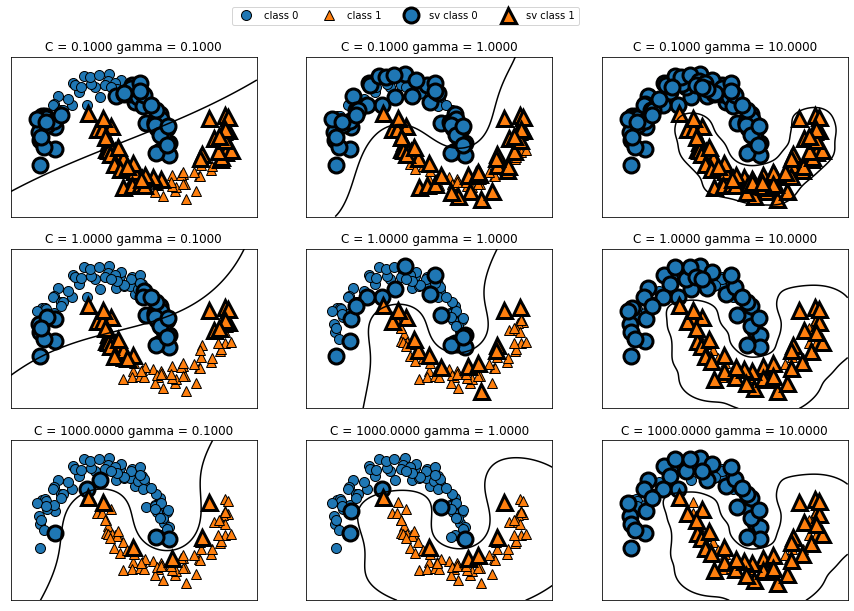

In [9]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))
for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        plot_svm(log_C=C, log_gamma=gamma, ax=a)
axes[0, 0].legend(["class 0", "class 1", "sv class 0",
"sv class 1"], ncol=4, loc=(.9, 1.2))

Grid search로 C, gamma 둘다 8개씩 총 64개의 테스트를 하였습니다.

In [10]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import EnsembleVoteClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=43)

#X_train, X_test표준화
scaler = StandardScaler()
scaler.fit(X_train) #일반화를 위해 train데이터 standard 객체를 test객체에 적용
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)


'''
그리드서치
'''
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

pipe_svc = Pipeline([('scl', StandardScaler()), ('clf', SVC(kernel='rbf',
                                                            random_state=1))])

param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
param_grid = [
   
    {'clf__C': param_range, 'clf__gamma': param_range, 'clf__kernel': ['rbf']}]

gs = GridSearchCV(estimator=pipe_svc, param_grid=param_grid,
                  scoring='accuracy', cv=10, n_jobs=1)


CPU times: user 1.07 s, sys: 3.86 ms, total: 1.07 s
Wall time: 1.07 s


In [23]:
print('검사한 grid search 후보들 : ', len(gs.cv_results_["params"]))

검사한 grid search 후보들 :  64


In [24]:
gs.cv_results_["mean_test_score"]

array([0.50666667, 0.50666667, 0.50666667, 0.50666667, 0.50666667,
       0.50666667, 0.50666667, 0.50666667, 0.50666667, 0.50666667,
       0.50666667, 0.50666667, 0.50666667, 0.50666667, 0.50666667,
       0.50666667, 0.50666667, 0.50666667, 0.50666667, 0.50666667,
       0.50666667, 0.50666667, 0.50666667, 0.50666667, 0.50666667,
       0.50666667, 0.50666667, 0.86666667, 0.96      , 0.97333333,
       0.50666667, 0.50666667, 0.50666667, 0.51333333, 0.86666667,
       0.86666667, 0.99333333, 0.99333333, 0.90666667, 0.63333333,
       0.51333333, 0.86666667, 0.86666667, 0.90666667, 0.99333333,
       0.98666667, 0.90666667, 0.64      , 0.86666667, 0.86666667,
       0.87333333, 0.98      , 0.99333333, 0.98666667, 0.90666667,
       0.64      , 0.86666667, 0.86      , 0.88      , 0.98666667,
       0.99333333, 0.98666667, 0.90666667, 0.64      ])

In [25]:
print('best score : ', gs.best_score_)
print('C : ', gs.best_params_['clf__C'], '/ gamma : ',gs.best_params_['clf__gamma'])

best score :  0.9933333333333334
C :  1.0 / gamma :  1.0


C :  1.0 / gamma :  1.0의 그래프

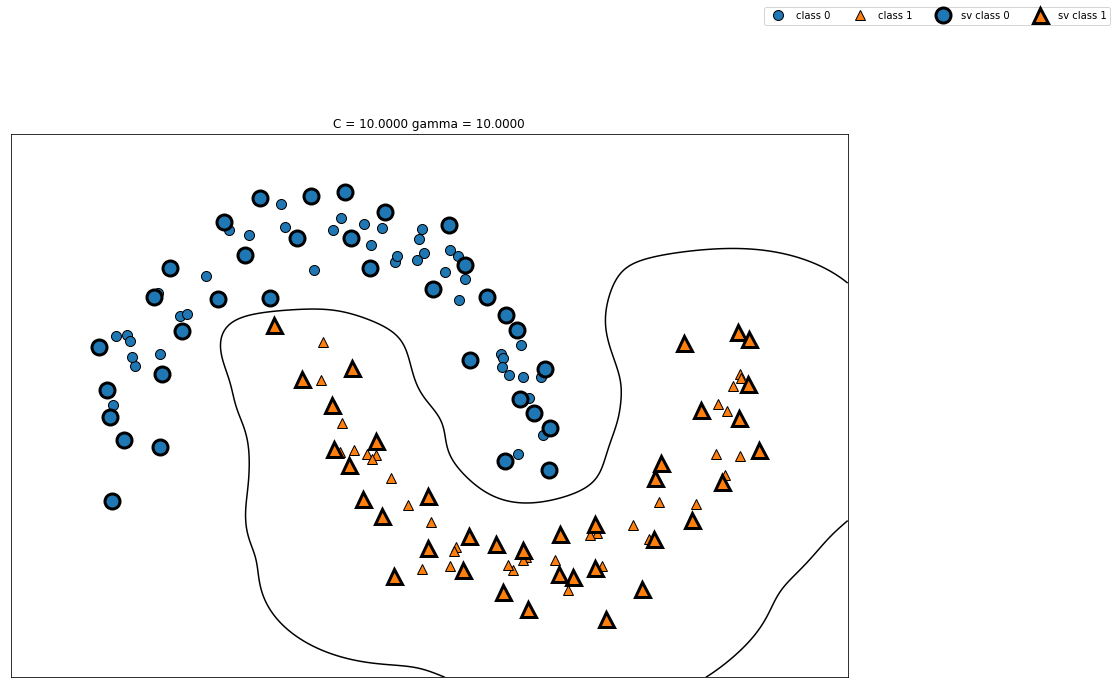

In [26]:
fig, axes = plt.subplots(figsize=(15, 10))

plot_svm(log_C=1, log_gamma=1, ax=axes)
axes.legend(["class 0", "class 1", "sv class 0",
"sv class 1"], ncol=4, loc=(.9, 1.2))